<a id='top'></a>

# Demonstration of the filters available in scipy.signal

This notebook is not intended to replace the SciPy reference guide but to serve only as a one stop shop for the filter functions available in the signal processing module (see http://docs.scipy.org/doc/scipy/reference/signal.html for detailed information). Alternative sources of information can be found in [this Wikipedia article](http://en.wikipedia.org/wiki/Filter_%28signal_processing%29) and elsewhere (e.g. [LabVIEW](http://www.ni.com/white-paper/3237/en/), [MATLAB](https://www.mathworks.com/discovery/filter-design.html)).

## Table of contents

[Preamble](#Preamble)

[Butterworth digital and analog filter](#Butterworth-digital-and-analog-filter)

[Chebyshev type I digital and analog filter](#Chebyshev-type-I-digital-and-analog-filter)

[Chebyshev type II digital and analog filter](#Chebyshev-type-II-digital-and-analog-filter)

[Elliptic (Cauer) digital and analog filter](#Elliptic-%28Cauer%29-digital-and-analog-filter)

[Bessel/Thomson digital and analog filter](#Bessel/Thomson-digital-and-analog-filter)

[Notch (band-stop) and Peak (band-pass) digital filter](#Notch-%28band-stop%29-and-Peak-%28band-pass%29-digital-filter)

[Odds and ends](#Odds-and-ends)

## Preamble

Before we can start demonstrating the filters, we have to setup the computational environment for this Python *notebook*:

In [1]:
# IPython magic commands
%matplotlib inline

# Python standard library
import sys
import os.path

# 3rd party modules
import numpy as np
import scipy as sp
import matplotlib as mpl

from scipy import signal
import matplotlib.pyplot as plt

print(sys.version)
for module in (np, sp, mpl):
    print('{:.<15}{}'.format(module.__name__, module.__version__))

3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
numpy..........1.12.1
scipy..........0.19.0
matplotlib.....2.0.2


In [2]:
def format_plots(ax, filter_name, column_name=('digital', 'analog')):
    """Format Bode plots"""
    for column in range(2):
        ax[0][column].set_title(f'{filter_name} {column_name[column]} filter')
        ax[0][column].set_xlabel('Frequency [Hz]')
        ax[0][column].set_ylabel('Amplitude [dB]')
        ax[0][column].margins(0, 0.1)
        ax[0][column].grid(b=True, which='both', axis='both')
        ax[0][column].legend()
        ax[1][column].set_xlabel('Frequency [Hz]')
        ax[1][column].set_ylabel('Phase [degrees]')
        ax[1][column].margins(0, 0.1)
        ax[1][column].grid(b=True, which='both', axis='both')
        ax[1][column].legend()

We are almost ready to start exploring the filters available at scipy.signal (http://docs.scipy.org/doc/scipy/reference/signal.html). In all of them we will consider the following base values:

In [3]:
fs = 200. # sampling frequency (Hz)
fc = 50. # critical frequency (Hz)
wc = fc/(fs/2.) # normalized frequency (half-cycles/sample)

[Back to top](#top)

## Butterworth digital and analog filter

[Butterworth filters](https://en.wikipedia.org/wiki/Butterworth_filter), signal.butter [function signature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter)

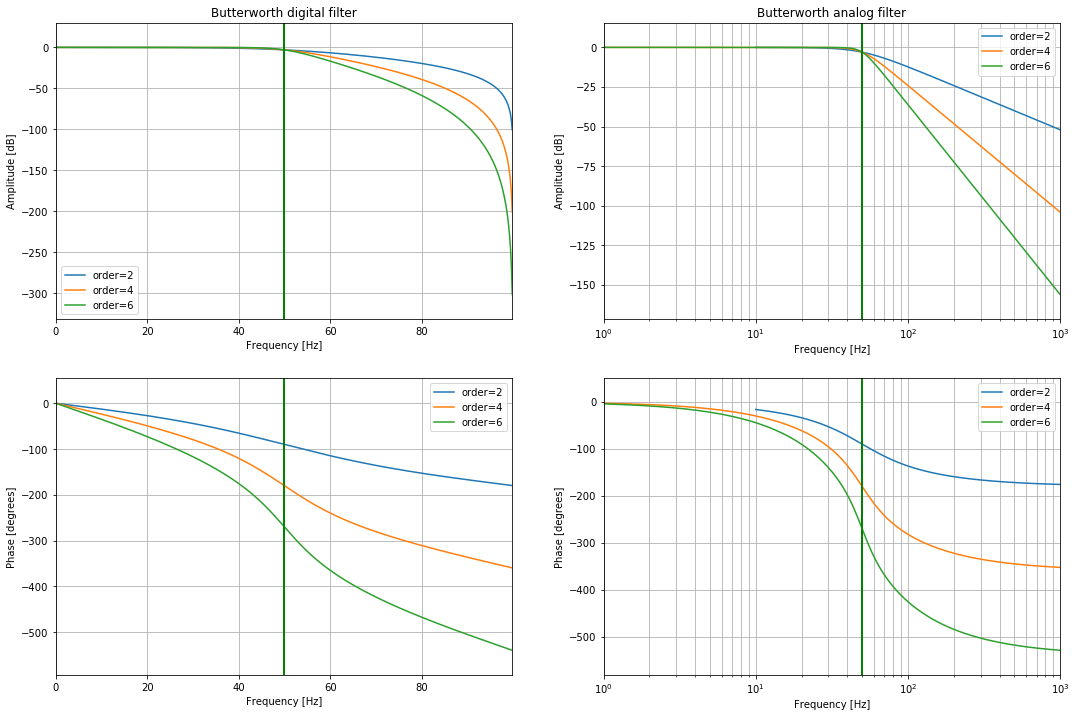

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
for order in range(3):
    # digital filter
    b, a = signal.butter(2*(order+1), wc, analog=False)
    w, h = signal.freqz(b, a)
    ax[0][0].plot(w*fs/(2*np.pi), 20 * np.log10(abs(h)), label=f'order={2*(order+1)}')
    ax[0][0].axvline(fc, color='green')
    ax[1][0].plot(w*fs/(2*np.pi), np.unwrap(np.angle(h))*180/np.pi, label=f'order={2*(order+1)}')
    ax[1][0].axvline(fc, color='green')
    # analog filter
    b, a = signal.butter(2*(order+1), fc, analog=True)
    w, h = signal.freqs(b, a)
    ax[0][1].semilogx(w, 20 * np.log10(abs(h)), label=f'order={2*(order+1)}')
    ax[0][1].axvline(fc, color='green')
    ax[1][1].semilogx(w, np.unwrap(np.angle(h))*180/np.pi, label=f'order={2*(order+1)}')
    ax[1][1].axvline(fc, color='green')
format_plots(ax, 'Butterworth')

[Back to top](#top)

## Chebyshev type I digital and analog filter

[Chebyshev type I filters](https://en.wikipedia.org/wiki/Chebyshev_filter), signal.cheby1 [function signature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby1.html#scipy.signal.cheby1)

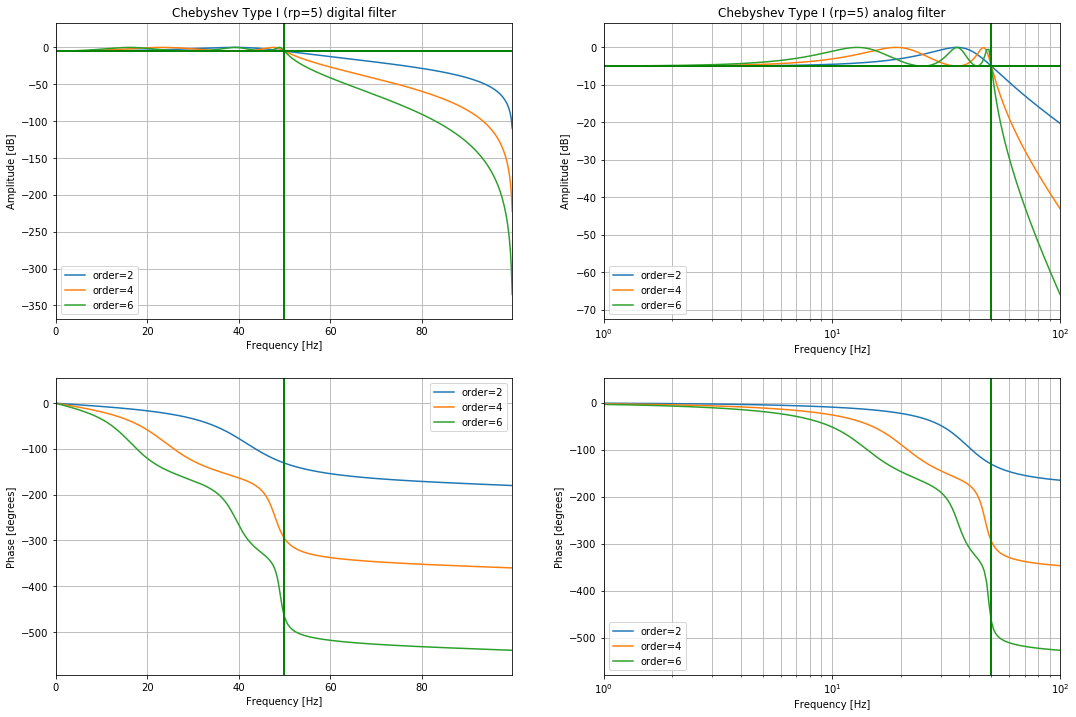

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
rp = 5 # maximum ripple allowed below unity gain in the passband, specified in decibels as a positive number
for order in range(3):
    # digital filter
    b, a = signal.cheby1(2*(order+1), rp, wc, analog=False)
    w, h = signal.freqz(b, a)
    ax[0][0].plot(w*fs/(2*np.pi), 20 * np.log10(abs(h)), label=f'order={2*(order+1)}')
    ax[0][0].axvline(fc, color='green')
    ax[0][0].axhline(-rp, color='green')
    ax[1][0].plot(w*fs/(2*np.pi), np.unwrap(np.angle(h))*180/np.pi, label=f'order={2*(order+1)}')
    ax[1][0].axvline(fc, color='green')
    # analog filter
    b, a = signal.cheby1(2*(order+1), rp, fc, analog=True)
    w, h = signal.freqs(b, a)
    ax[0][1].semilogx(w, 20 * np.log10(abs(h)), label=f'order={2*(order+1)}')
    ax[0][1].axvline(fc, color='green')
    ax[0][1].axhline(-rp, color='green')
    ax[1][1].semilogx(w, np.unwrap(np.angle(h))*180/np.pi, label=f'order={2*(order+1)}')
    ax[1][1].axvline(fc, color='green')
format_plots(ax, f'Chebyshev Type I (rp={rp})')

[Back to top](#top)

## Chebyshev type II digital and analog filter

[Chebyshev type II filters](https://en.wikipedia.org/wiki/Chebyshev_filter), signal.cheby2 [function signature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby2.html#scipy.signal.cheby2)

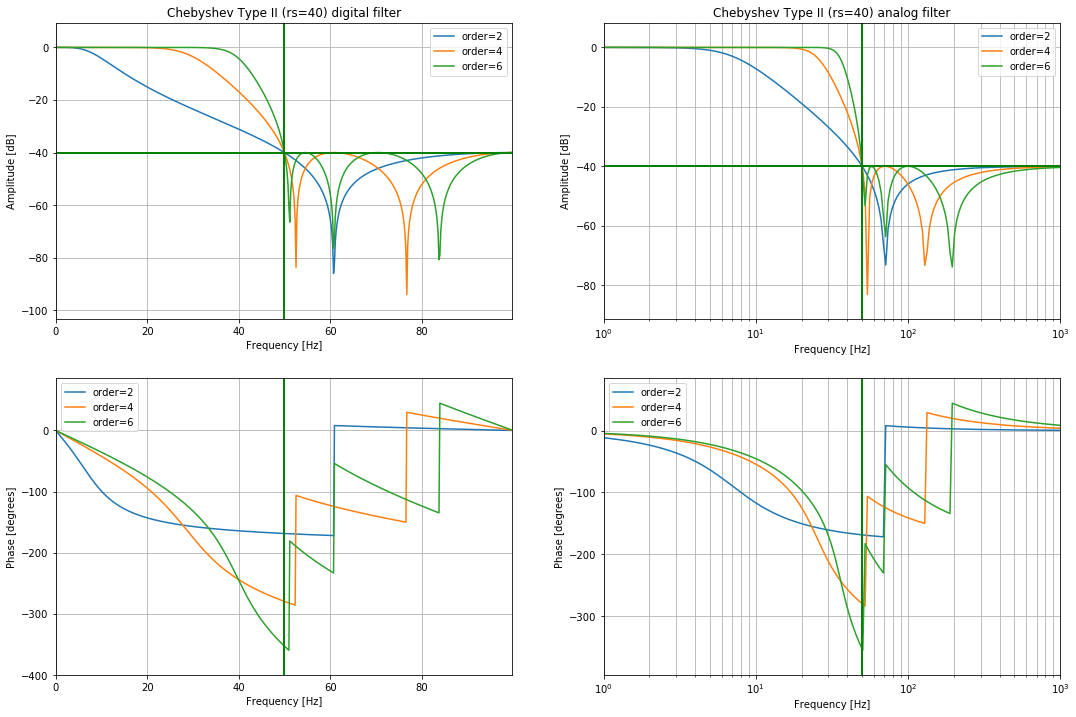

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
rs = 40 # minimum attenuation required in the stop band, specified in decibels as a positive number
for order in range(3):
    # digital filter
    b, a = signal.cheby2(2*(order+1), rs, wc, analog=False)
    w, h = signal.freqz(b, a)
    ax[0][0].plot(w*fs/(2*np.pi), 20 * np.log10(abs(h)), label=f'order={2*(order+1)}')
    ax[0][0].axvline(fc, color='green')
    ax[0][0].axhline(-rs, color='green')
    ax[1][0].plot(w*fs/(2*np.pi), np.unwrap(np.angle(h))*180/np.pi, label=f'order={2*(order+1)}')
    ax[1][0].axvline(fc, color='green')
    # analog filter
    b, a = signal.cheby2(2*(order+1), rs, fc, analog=True)
    w, h = signal.freqs(b, a)
    ax[0][1].semilogx(w, 20 * np.log10(abs(h)), label=f'order={2*(order+1)}')
    ax[0][1].axvline(fc, color='green')
    ax[0][1].axhline(-rs, color='green')
    ax[1][1].semilogx(w, np.unwrap(np.angle(h))*180/np.pi, label=f'order={2*(order+1)}')
    ax[1][1].axvline(fc, color='green')
format_plots(ax, f'Chebyshev Type II (rs={rs})')

[Back to top](#top)

## Elliptic (Cauer) digital and analog filter

[Elliptic (Cauer) filters](https://en.wikipedia.org/wiki/Elliptic_filter), signal.ellip [function signature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellip.html#scipy.signal.ellip)

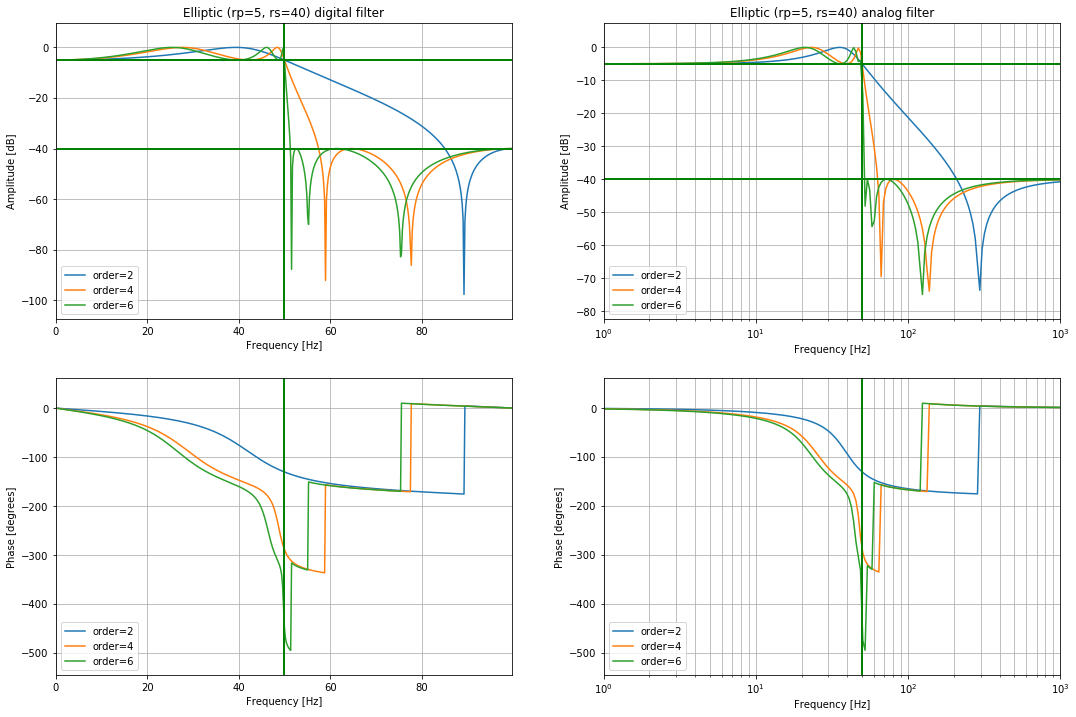

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
rp = 5 # maximum ripple allowed below unity gain in the passband, specified in decibels as a positive number
rs = 40 # minimum attenuation required in the stop band, specified in decibels as a positive number
for order in range(3):
    # digital filter
    b, a = signal.ellip(2*(order+1), rp, rs, wc, analog=False)
    w, h = signal.freqz(b, a)
    ax[0][0].plot(w*fs/(2*np.pi), 20 * np.log10(abs(h)), label=f'order={2*(order+1)}')
    ax[0][0].axvline(fc, color='green')
    ax[0][0].axhline(-rp, color='green')
    ax[0][0].axhline(-rs, color='green')
    ax[1][0].plot(w*fs/(2*np.pi), np.unwrap(np.angle(h))*180/np.pi, label=f'order={2*(order+1)}')
    ax[1][0].axvline(fc, color='green')
    # analog filter
    b, a = signal.ellip(2*(order+1), rp, rs, fc, analog=True)
    w, h = signal.freqs(b, a)
    ax[0][1].semilogx(w, 20 * np.log10(abs(h)), label=f'order={2*(order+1)}')
    ax[0][1].axvline(fc, color='green')
    ax[0][1].axhline(-rp, color='green')
    ax[0][1].axhline(-rs, color='green')
    ax[1][1].semilogx(w, np.unwrap(np.angle(h))*180/np.pi, label=f'order={2*(order+1)}')
    ax[1][1].axvline(fc, color='green')
format_plots(ax, f'Elliptic (rp={rp}, rs={rs})')

[Back to top](#top)

## Bessel/Thomson digital and analog filter

[Bessel/Thomson filters](https://en.wikipedia.org/wiki/Bessel_filter), signal.bessel [function signature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bessel.html#scipy.signal.bessel)

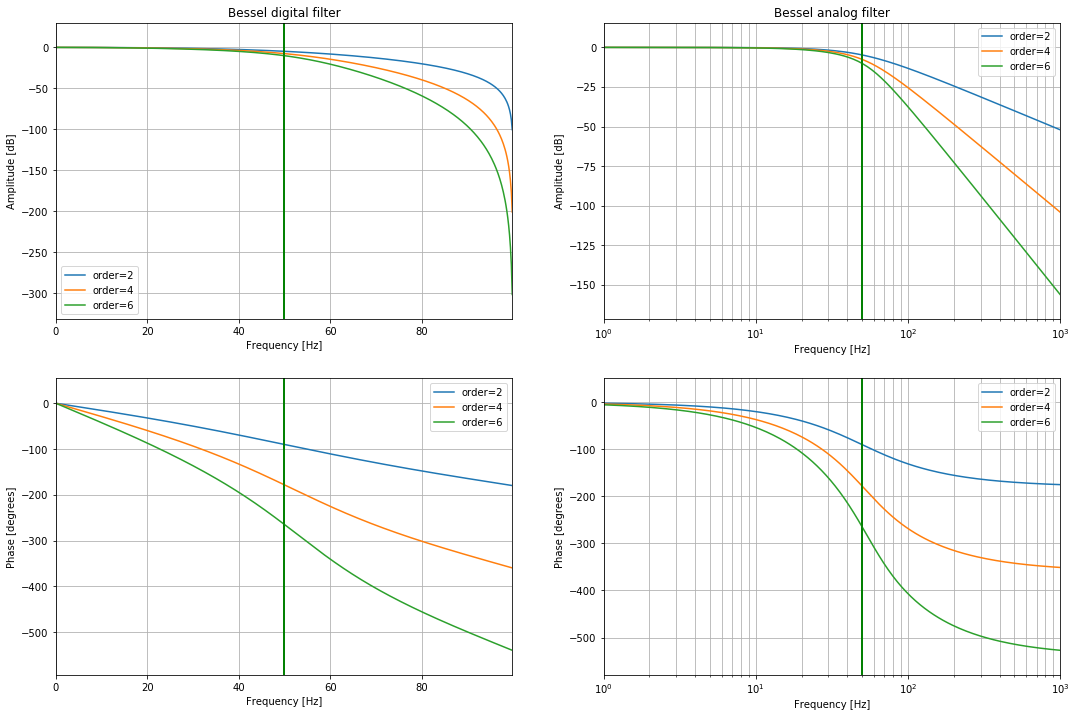

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
for order in range(3):
    # digital filter
    b, a = signal.bessel(2*(order+1), wc, analog=False)
    w, h = signal.freqz(b, a)
    ax[0][0].plot(w*fs/(2*np.pi), 20 * np.log10(abs(h)), label=f'order={2*(order+1)}')
    ax[0][0].axvline(fc, color='green')
    ax[1][0].plot(w*fs/(2*np.pi), np.unwrap(np.angle(h))*180/np.pi, label=f'order={2*(order+1)}')
    ax[1][0].axvline(fc, color='green')
    # analog filter
    b, a = signal.bessel(2*(order+1), fc, analog=True)
    w, h = signal.freqs(b, a)
    ax[0][1].semilogx(w, 20 * np.log10(abs(h)), label=f'order={2*(order+1)}')
    ax[0][1].axvline(fc, color='green')
    ax[1][1].semilogx(w, np.unwrap(np.angle(h))*180/np.pi, label=f'order={2*(order+1)}')
    ax[1][1].axvline(fc, color='green')
format_plots(ax, 'Bessel')

[Back to top](#top)

## Notch (band-stop) and Peak (band-pass) digital filter

[Notch filters](https://en.wikipedia.org/wiki/Band-stop_filter), signal.iirnotch [function signature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirnotch.html#scipy.signal.iirnotch)

[Peak filters](https://en.wikipedia.org/wiki/Band-pass_filter), signal.iirpeak [function signature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirpeak.html#scipy.signal.iirpeak)

C:\Users\Paulo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\Paulo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


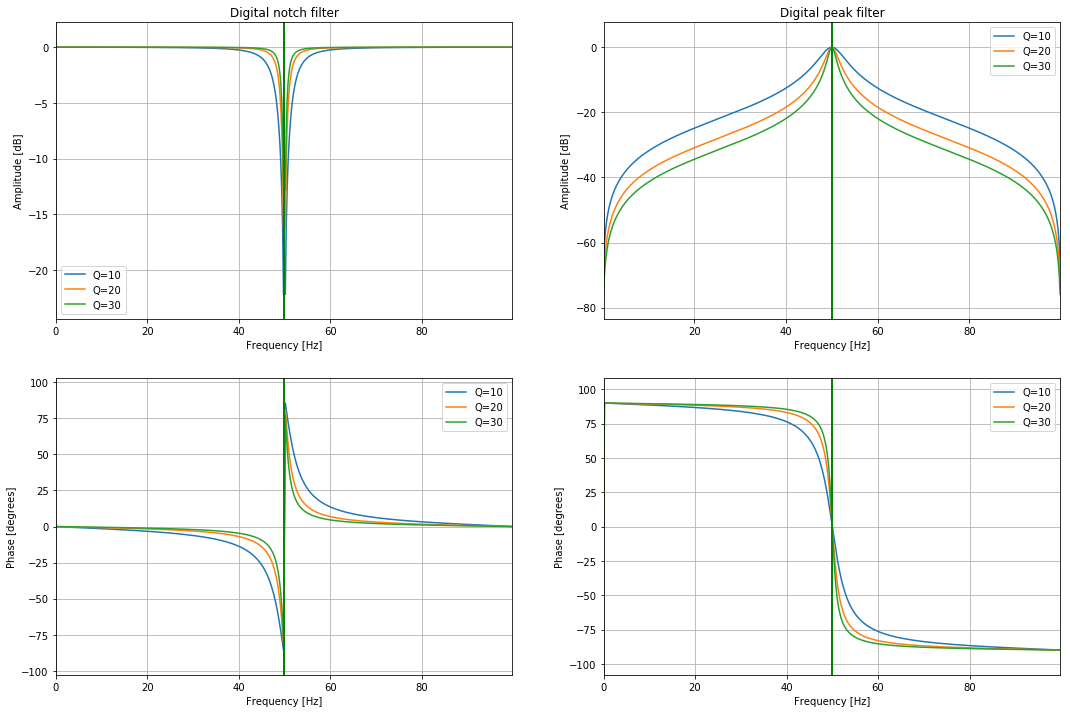

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
for Q in range(3): # quality factor
    # Notch filter
    b, a = signal.iirnotch(wc, 10*(Q+1))
    w, h = signal.freqz(b, a)
    ax[0][0].plot(w*fs/(2*np.pi), 20 * np.log10(abs(h)), label=f'Q={10*(Q+1)}')
    ax[0][0].axvline(fc, color='green')
    ax[1][0].plot(w*fs/(2*np.pi), np.unwrap(np.angle(h))*180/np.pi, label=f'Q={10*(Q+1)}')
    ax[1][0].axvline(fc, color='green')
    # Peak filter
    b, a = signal.iirpeak(wc, 10*(Q+1))
    w, h = signal.freqz(b, a)
    ax[0][1].plot(w*fs/(2*np.pi), 20 * np.log10(abs(h)), label=f'Q={10*(Q+1)}')
    ax[0][1].axvline(fc, color='green')
    ax[1][1].plot(w*fs/(2*np.pi), np.unwrap(np.angle(h))*180/np.pi, label=f'Q={10*(Q+1)}')
    ax[1][1].axvline(fc, color='green')
format_plots(ax, 'Digital', column_name=('notch', 'peak'))

[Back to top](#top)

## Odds and ends

This Python *notebook* was created by Paulo Xavier Candeias.

[Back to top](#top)